In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mobile-sales-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5449228%2F9039191%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240727%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240727T131737Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D06c699c0454f8fffa1594dc65d7365abc2868c831ff8daa7a92d1a8eb85a6a1db2b4f74adcecd5ac328b3528b4f310dcf7f0dff4ea815a04005c693fe4573d35950ce7262e314c75f49b0aa53592c9fab1b78ff8e081a589ef0b927591dcc939f29b5980f753f82b959f9911993fa8a37cdc1d045c9e6682476340564563e4346bf18ac2988c1010c261d93e5a7e7a0e9e47333085e820926adf05c528e61487b2f6d1651cbad61b0e5a7dae91806c7cc8543c35c1dde40b065c8d6b9c084ebb22e1311a8e411b149cbdaf0c4056eb6279b098a7261dcb87135973c7a20bbb401b29d426ac90e01c85aa1b3f48542c865e0fdf84b47e07a0598404f591fc3a39'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 59080 bytes downloaded
Downloaded and uncompressed: mobile-sales-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-sales-dataset/mobile_sales.csv


In [ ]:
df = pd.read_csv('/kaggle/input/mobile-sales-dataset/mobile_sales.csv')

In [ ]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online


In [ ]:
df.drop(columns = ['TransactionID','Date','Location'],inplace =  True)

In [ ]:
df.head()

,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,PaymentMethod
0,direction,Green Inc,1196.95,85,28002.80,32,Female,Online
1,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,Credit Card
2,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,Online
3,keep,Greer and Sons,338.60,79,31159.75,46,Other,Cash
4,option,Brown and Sons,839.79,41,11523.36,38,Male,Online


In [ ]:
df.isnull().sum()

MobileModel       0
Brand             0
Price             0
UnitsSold         0
TotalRevenue      0
CustomerAge       0
CustomerGender    0
PaymentMethod     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MobileModel     1000 non-null   object 
 1   Brand           1000 non-null   object 
 2   Price           1000 non-null   float64
 3   UnitsSold       1000 non-null   int64  
 4   TotalRevenue    1000 non-null   float64
 5   CustomerAge     1000 non-null   int64  
 6   CustomerGender  1000 non-null   object 
 7   PaymentMethod   1000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['MobileModel'].value_counts()

MobileModel
many       5
service    5
eat        4
believe    4
mouth      4
          ..
see        1
listen     1
policy     1
change     1
memory     1
Name: count, Length: 637, dtype: int64

In [ ]:
df['Brand'].value_counts()

Brand
Martinez Ltd                   3
Sanchez PLC                    3
Ramos and Sons                 2
Williams Group                 2
Miller and Sons                2
                              ..
Jackson, Collier and Barber    1
Perez and Sons                 1
Ayers and Sons                 1
Holland PLC                    1
Kim, Maxwell and Moore         1
Name: count, Length: 980, dtype: int64

<Axes: ylabel='Price'>

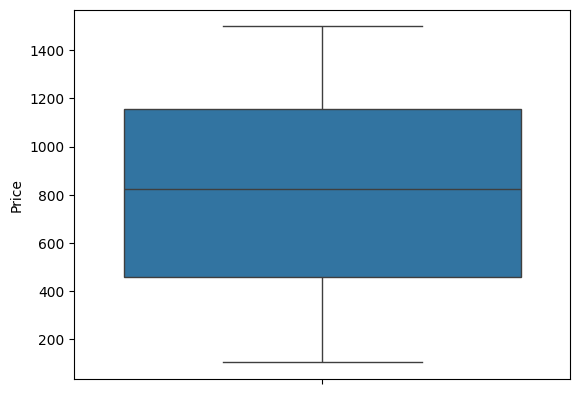

In [ ]:
sns.boxplot(df['Price'])

<Axes: ylabel='CustomerAge'>

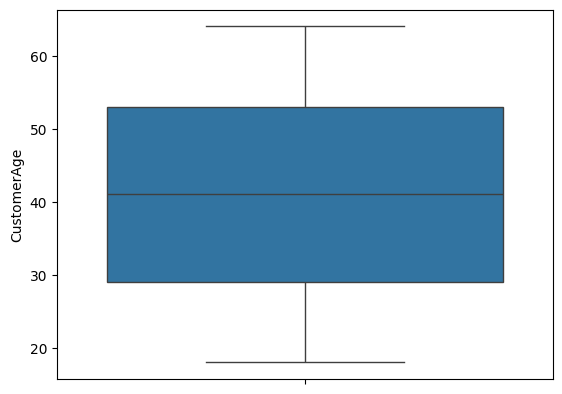

In [ ]:
sns.boxplot(df['CustomerAge'])

<Axes: ylabel='UnitsSold'>

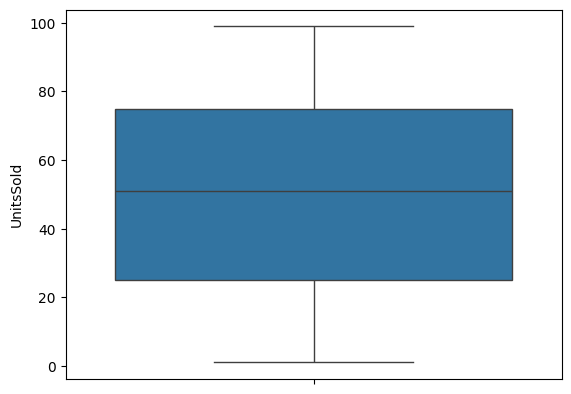

In [ ]:
sns.boxplot(df['UnitsSold'])

<Axes: ylabel='TotalRevenue'>

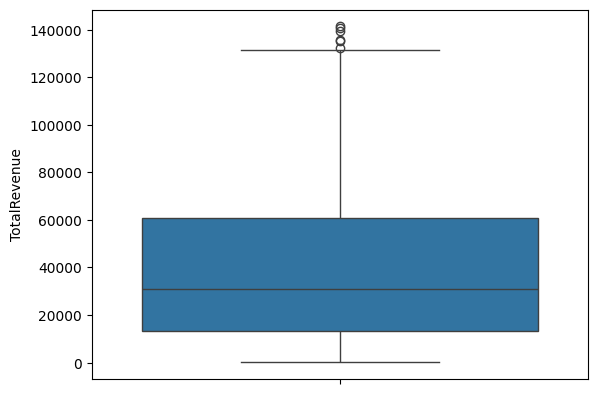

In [ ]:
 sns.boxplot(df['TotalRevenue'])

<Axes: xlabel='CustomerGender'>

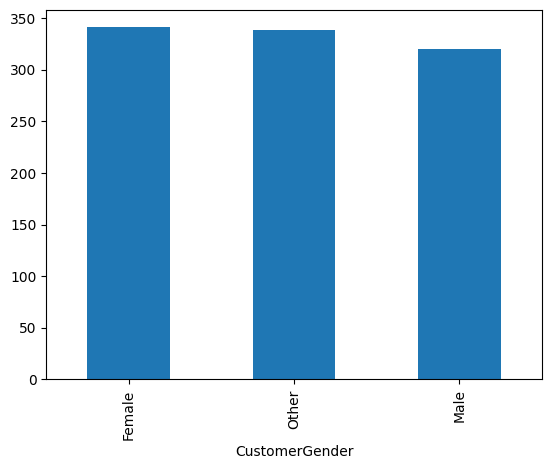

In [ ]:
df['CustomerGender'].value_counts().plot(kind = 'bar')

<Axes: ylabel='Price'>

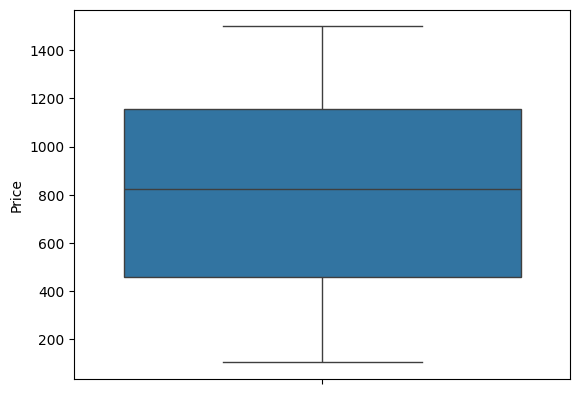

In [ ]:
sns.boxplot(df['Price'])

In [ ]:
df.head(2)

,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,PaymentMethod
0,direction,Green Inc,1196.95,85,28002.80,32,Female,Online
1,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,Credit Card


In [ ]:
df['PaymentMethod'].value_counts()

PaymentMethod
Credit Card    278
Online         259
Debit Card     246
Cash           217
Name: count, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Encode the target variable
label_encoder = LabelEncoder()
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])

# Split the data into training and test sets
X = df.drop(columns=['PaymentMethod'])
y = df['PaymentMethod']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_features = ['Brand', 'CustomerGender']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Decode the predictions back to the original labels if needed
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print decoded classification report
print("Decoded Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.25      0.63      0.35        78
           2       0.23      0.26      0.24        80
           3       0.33      0.03      0.05        77

    accuracy                           0.24       300
   macro avg       0.20      0.23      0.16       300
weighted avg       0.21      0.24      0.17       300

Decoded Classification Report:
              precision    recall  f1-score   support

        Cash       0.00      0.00      0.00        65
 Credit Card       0.25      0.63      0.35        78
  Debit Card       0.23      0.26      0.24        80
      Online       0.33      0.03      0.05        77

    accuracy                           0.24       300
   macro avg       0.20      0.23      0.16       300
weighted avg       0.21      0.24      0.17       300

